In [1]:
import numpy as np
import pandas as pd

# [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult)

Predict whether income exceeds $50K/yr based on census data.
Also known as "Census Income" dataset.

**Attributes**

- age
- workclass
  - Represents the employment status of an individual
- fnlwgt
  - Final weight which is the number of people the census believes the entry represents
  - People with similar demographic characteristics should have similar weights
    - This only applies within state.
- education
  - The highest level of education achieved by an individual
- education-num
  - The highest level of education achieved in numerical form
- marital-status
- relationship
  - Represents what this individual is relative to others
- race
- sex
- capital-gain
- capital-loss
- hours-per-week
  - The hours an individual has reported to work per week
- native-country

# Data Load

## Data Files

I have cut the [original data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)
into 4 seprate files.

https://github.com/sesise0307/pydata2021-eda/tree/main/data

<img src="../image/data_list.png" alt="Data List" width="300"/>

## Loading a file

In [2]:
df_0 = pd.read_csv(
    '../data/adult-0.data',
#     'https://raw.githubusercontent.com/sesise0307/pydata2021-eda/main/data/adult-0.data',
)

df_0.shape

(9999, 15)

In [3]:
df_0.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income',
]

In [5]:
df_0 = pd.read_csv(
    '../data/adult-0.data',
#     'https://raw.githubusercontent.com/sesise0307/pydata2021-eda/main/data/adult-0.data',
    names=names,
    skipinitialspace=True,  # Skip spaces after delimiter
)

df_0.shape

(10000, 15)

In [6]:
df_0.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Merging many files

TODO: Quiz?

In [7]:
df_list = list()

for i in range(4):
    df_list.append(
        pd.read_csv(
            f'../data/adult-{i}.data',
#             f'https://raw.githubusercontent.com/sesise0307/pydata2021-eda/main/data/adult-{i}.data',
            names=names,
            skipinitialspace=True,
        )
    )

df = pd.concat(df_list, ignore_index=True)

In [8]:
df.shape

(32561, 15)

In [9]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Essential Check & Preprocessing

## info() and describe()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.describe(exclude=np.number)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Unique Values

In [13]:
for column in df.columns:
    n_unique = df[column].nunique()
    
    if df[column].nunique() < 50:
        print(f'{column} ({n_unique}): {df[column].unique()}')
    else:
        print(f'{column} ({n_unique})')

age (73)
workclass (9): ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt (21648)
education (16): ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education_num (16): [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status (7): ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation (15): ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship (6): ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race (5): ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex (2): ['Male' 'F

> Note that, if a variable contains only 1 unique value, it does not have information.

## NaN Values

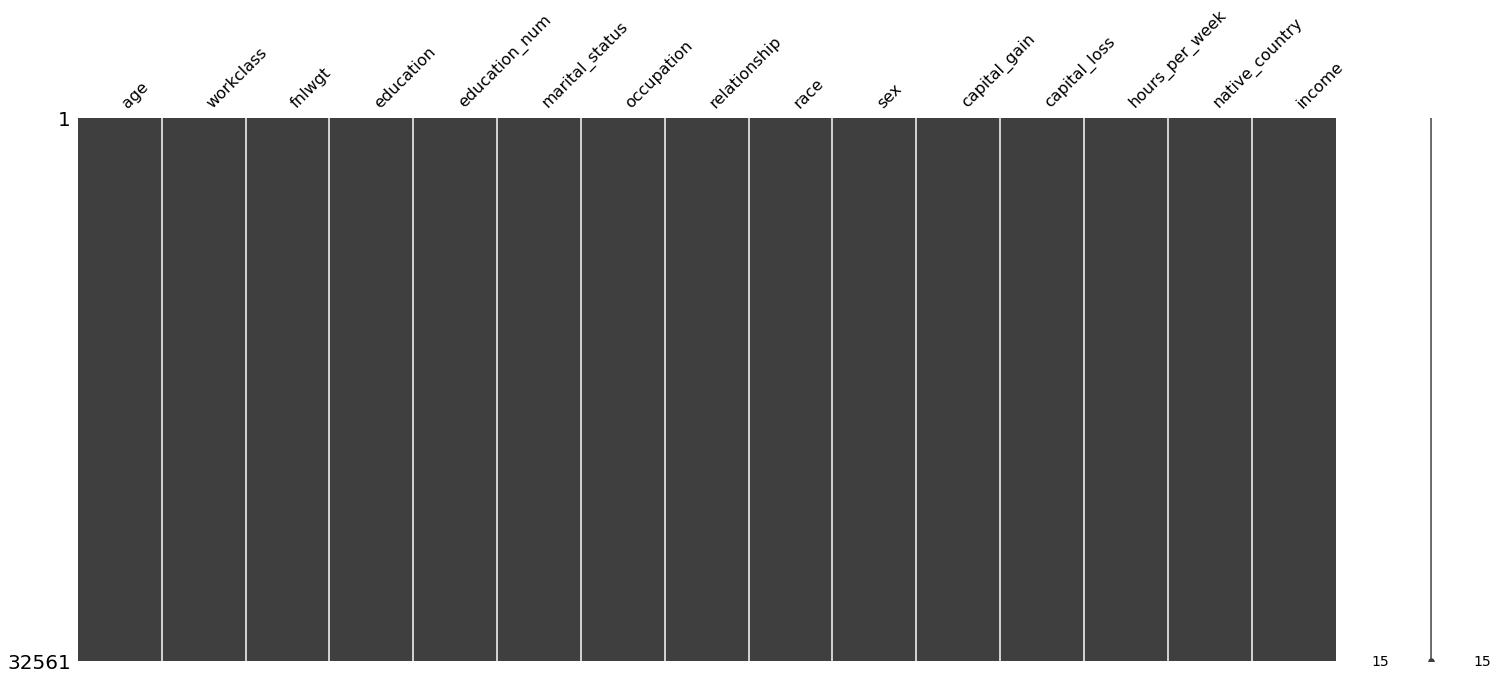

In [14]:
import missingno as msno

msno.matrix(df);

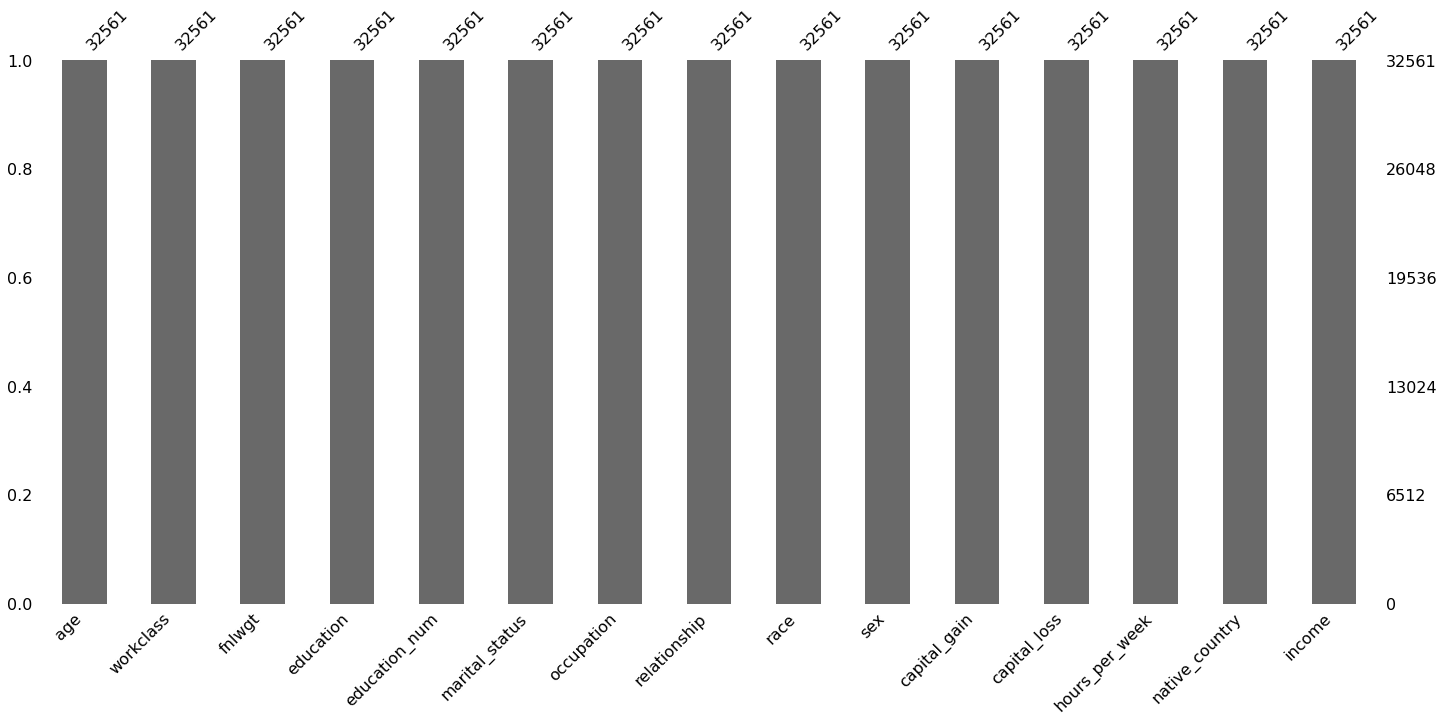

In [15]:
msno.bar(df);

In [16]:
# Replace '?' to NaN
df = df.replace('?', np.nan)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


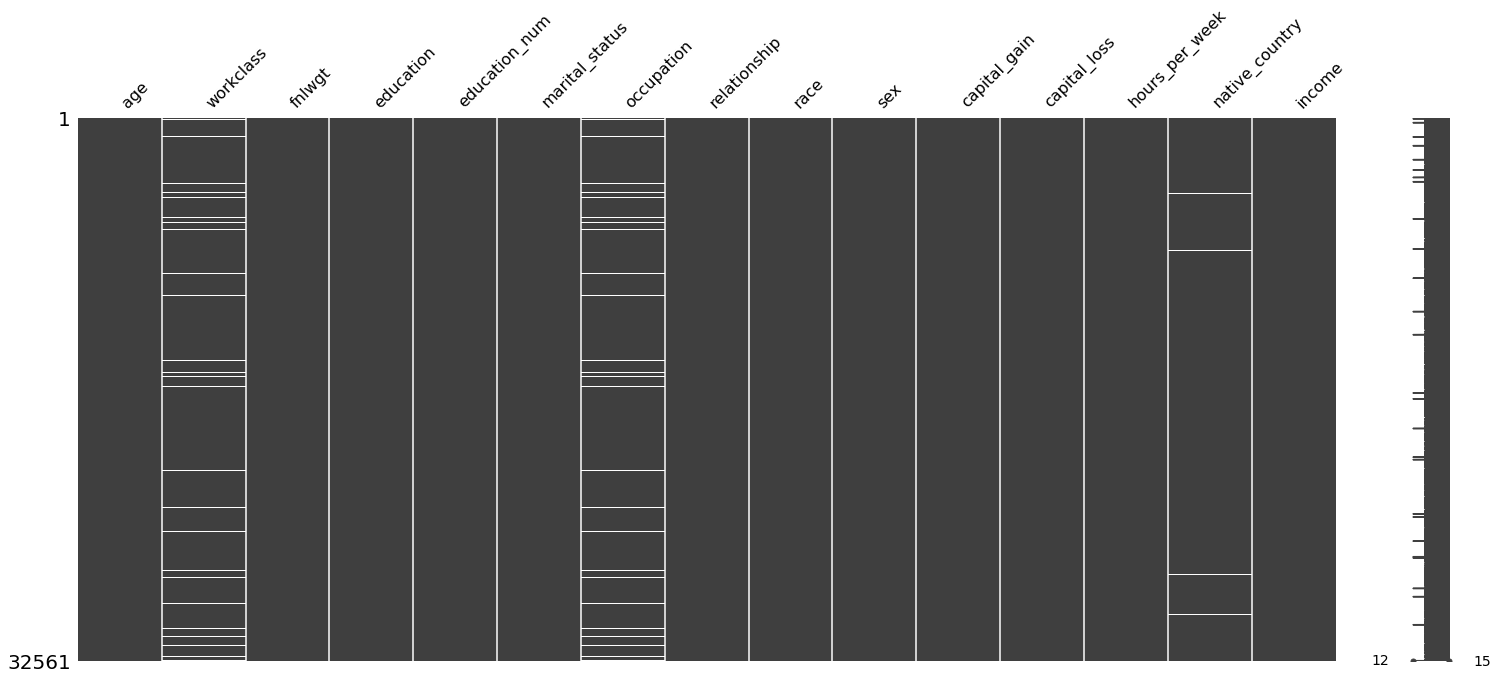

In [17]:
msno.matrix(df);

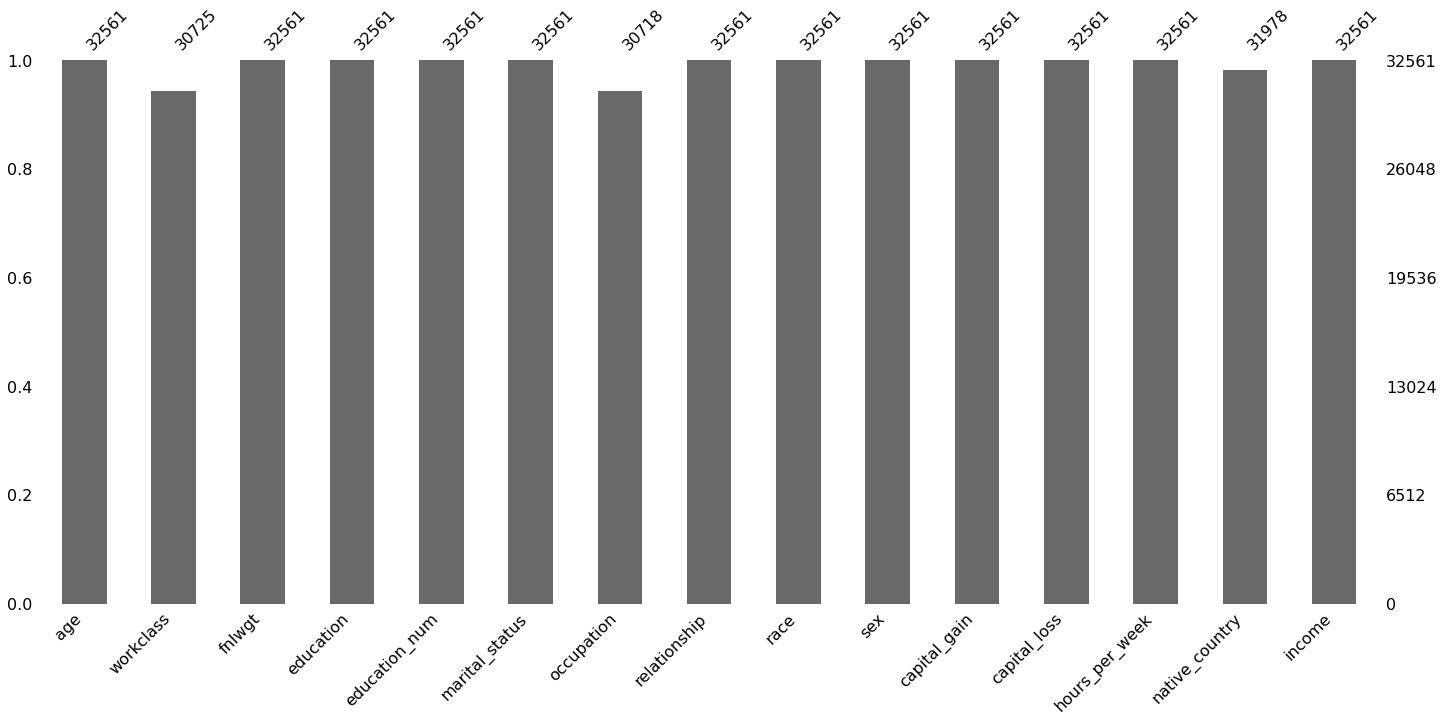

In [18]:
msno.bar(df);

In [19]:
# Manual computation of NaN ratio
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

occupation        0.056601
workclass         0.056386
native_country    0.017905
age               0.000000
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
income            0.000000
dtype: float64

How to handle missing data

Drop or fill
- How to fill

Row vs column

In [20]:
# Drop rows with at least one NaN values
df = df.dropna().reset_index(drop=True)

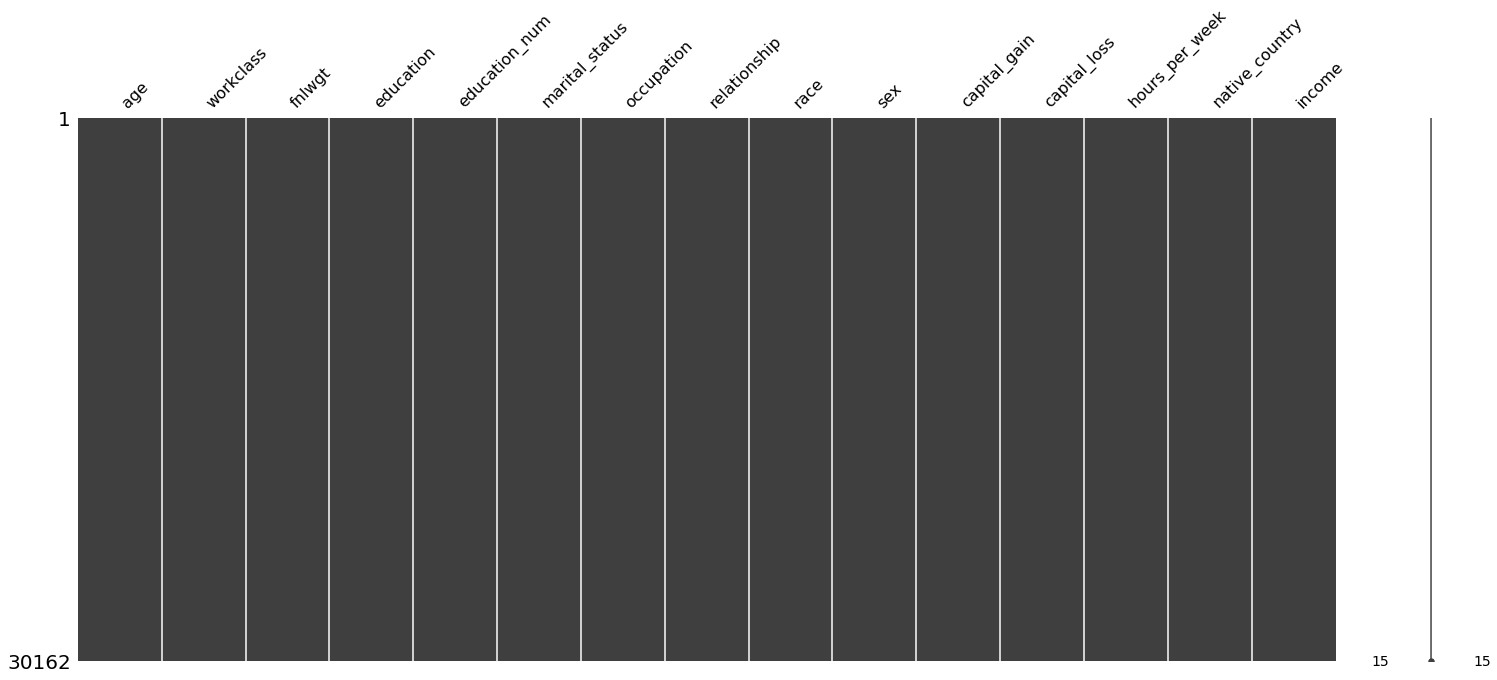

In [21]:
msno.matrix(df);

# (Primitive) Feature Engineering

## Age Grouping

In [22]:
df['age_group'] = pd.cut(
    df['age'],
    bins=range(10, 101, 10),
    right=False,
    labels=[f'{age_start}~{age_start + 9}' for age_start in range(10, 100, 10)]
)

In [23]:
df['age_group'].cat.categories

Index(['10~19', '20~29', '30~39', '40~49', '50~59', '60~69', '70~79', '80~89',
       '90~99'],
      dtype='object')

In [24]:
df[['age', 'age_group']].sample(10)

,age,age_group
1947,45,40~49
27294,29,20~29
29438,19,10~19
17710,19,10~19
14040,40,40~49
433,49,40~49
9121,34,30~39
13268,24,20~29
24589,28,20~29
12998,33,30~39


## Cateogry and Category Ordering

In [25]:
(
    df
    .groupby('education')['education_num']
    .unique()
    .sort_values()
)

education
Preschool        [1]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
10th             [6]
11th             [7]
12th             [8]
HS-grad          [9]
Some-college    [10]
Assoc-voc       [11]
Assoc-acdm      [12]
Bachelors       [13]
Masters         [14]
Prof-school     [15]
Doctorate       [16]
Name: education_num, dtype: object

In [26]:
education_order = (
    df
    .groupby('education')['education_num']
    .unique()
    .sort_values()
    .index
)

In [27]:
df['education'] = df['education'].astype(
    pd.CategoricalDtype(categories=education_order,
                        ordered=True)
)

In [28]:
df['education'].head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: category
Categories (16, object): ['Preschool' < '1st-4th' < '5th-6th' < '7th-8th' ... 'Bachelors' < 'Masters' < 'Prof-school' < 'Doctorate']

In [29]:
df['education_num'] = df['education_num'].astype(
    pd.CategoricalDtype(ordered=True)
)

In [30]:
df['education_num'].head()

0    13
1    13
2     9
3     7
4    13
Name: education_num, dtype: category
Categories (16, int64): [1 < 2 < 3 < 4 ... 13 < 14 < 15 < 16]

## Captial gain and loss

In [31]:
df[['capital_gain', 'capital_loss']].sample(10)

,capital_gain,capital_loss
18881,0,0
19436,4865,0
5178,0,0
11058,0,0
27410,0,0
13156,0,0
14484,0,0
20820,0,0
25690,15024,0
26170,0,0


In [32]:
(  # Check if capital gain and capital loss appear at the same time
    df[['capital_gain', 'capital_loss']]
#     .astype(bool)
#     .sum(axis='columns')
#     .max()
)

,capital_gain,capital_loss
0,2174,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
30157,0,0
30158,0,0
30159,0,0
30160,0,0


In [33]:
df['capital_gain'] = df['capital_gain'] - df['capital_loss']
df = df.drop(columns='capital_loss')
df['capital_gain'].sample(10)

18868       0
17391       0
24689       0
18279       0
2780    -2415
5340        0
5669        0
29791   -1602
13814    7298
3518        0
Name: capital_gain, dtype: int64

## Income exceeds $50K/yr

In [34]:
df['income_exceed_50k'] = df['income'] == '>50K'

In [35]:
df[['income', 'income_exceed_50k']].sample(10)

,income,income_exceed_50k
21850,<=50K,False
29125,>50K,True
23057,>50K,True
273,<=50K,False
11483,<=50K,False
45,<=50K,False
7286,<=50K,False
488,<=50K,False
19669,<=50K,False
25432,>50K,True


## Adding Fake Income (for fun)

In [36]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,income,age_group,income_exceed_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K,30~39,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K,50~59,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K,30~39,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K,50~59,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K,20~29,False


In [37]:
import random

def get_fake_income(row):
    exceed_50k = row['income_exceed_50k']
        
    weight_age = 1.2 if 40 <= row['age'] <= 55 else 1.0
    weight_hours_per_week = 1.2 if 38 <= row['hours_per_week'] else 0.8
    weight_race = 1.2 if row['race'] == 'White' else 0.9
    weight_sex = 1.2 if row['sex'] == 'Male' else 0.9
    
    mu = 35000 * weight_age * weight_hours_per_week * weight_race * weight_sex
    sigma = mu * random.uniform(0.5, 1.5)
    
    while True:  # Guarantee fake income is conform to exceed_50k
        income = int(random.gauss(mu, sigma))
        
        if exceed_50k and 50000 < income:
            return income
        
        elif not exceed_50k and 1000 < income <= 50000:
            return income

In [38]:
random.seed(42)
df['fake_income'] = df.apply(get_fake_income, axis='columns')

## Other Feature Engineering

TODO: Add some links or summary table for more feature engineerings

# Save

pandas supports various files types for both reading and saving your DataFrame.

![Pandas I/O](../image/pandas_io.png)

Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

[The Best Format to Save Pandas Data](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d)

"It seems that feather format is an ideal candidate to store the data between Jupyter sessions. It shows high I/O speed, doesn’t take too much memory on the disk and doesn’t need any unpacking when loaded back into RAM."

In [39]:
# df.to_feather('adult_preprocessed.feather')
df.to_feather('../data/preprocessed/adult.feather')

In [40]:
# df_feather = pd.read_feather('adult_preprocessed.feather')
df_feather = pd.read_feather('../data/preprocessed/adult.feather')
df_feather.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,income,age_group,income_exceed_50k,fake_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K,30~39,False,44506
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K,50~59,False,48120
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K,30~39,False,13343
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K,50~59,False,42772
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K,20~29,False,37312


In [41]:
df_feather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                30162 non-null  int64   
 1   workclass          30162 non-null  object  
 2   fnlwgt             30162 non-null  int64   
 3   education          30162 non-null  category
 4   education_num      30162 non-null  category
 5   marital_status     30162 non-null  object  
 6   occupation         30162 non-null  object  
 7   relationship       30162 non-null  object  
 8   race               30162 non-null  object  
 9   sex                30162 non-null  object  
 10  capital_gain       30162 non-null  int64   
 11  hours_per_week     30162 non-null  int64   
 12  native_country     30162 non-null  object  
 13  income             30162 non-null  object  
 14  age_group          30162 non-null  category
 15  income_exceed_50k  30162 non-null  bool    
 16  fake